# Machine Learning Nanodegree Capstone Project
**Casey Whorton**

**Python V3.0**

# Import Packages & Custom Functions

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image,display
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Flatten
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

C:\Users\Casey\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [3]:
#Define some functions to calculate the above metric (RMSLE) for scaled data and un-scaled data for price
def rmsle(p_price,a_price):
    term1=np.log(p_price+1)
    term2=np.log(a_price+1)
    term_sq=(term1-term2)**2
    term_sum=term_sq.sum()
    msle=term_sum*(1.0/len(p_price))
    root_msle=msle**(0.5)
    return(root_msle)

def std_scaler_inverse(vector,mean_,std_):
    vector_inv = vector*std_ + mean_
    return(vector_inv)

#Define a function here to find overlapping rows based on type of component

def my_merger(bill_of_materials_df,comp_df,component_id_list):
    list_of_counts = list()
    for number in component_id_list:
        h=pd.merge(pd.DataFrame(bill_of_materials_df[number]),pd.DataFrame(comp_df['component_id']),
        left_on=number,right_on='component_id')
        list_of_counts.append(h.count()[0])
    return(list_of_counts)

# Data Extraction

Folder: C:\Users\Casey\Desktop\Capstone Project\competition_data

Tables:

bill_of_materials.csv, 
comp_adaptor.csv, 
comp_boss.csv, 
comp_elbow.csv, 
comp_float.csv, 
comp_hfl.csv, 
comp_other.csv, 
comp_sleeve.csv, 
comp_straight.csv, 
comp_tee.csv, 
comp_threaded.csv, 
components.csv, 
specs.csv, 
test_set.csv, 
train_set.csv, 
tube.csv, 
tube_end_form.csv, 
type_component.csv, 
type_connection.csv, 
type_end_form.csv

In [4]:
bill_of_materials = pd.read_csv('C:\\Users\\Casey\\Desktop\\Capstone Project\\competition_data\\bill_of_materials.csv')
comp_adaptor = pd.read_csv('C:\\Users\\Casey\\Desktop\\Capstone Project\\competition_data\\comp_adaptor.csv')
comp_boss = pd.read_csv('C:\\Users\\Casey\\Desktop\\Capstone Project\\competition_data\\comp_boss.csv')
comp_elbow = pd.read_csv('C:\\Users\\Casey\\Desktop\\Capstone Project\\competition_data\\comp_elbow.csv')
comp_float = pd.read_csv('C:\\Users\\Casey\\Desktop\\Capstone Project\\competition_data\\comp_float.csv')
comp_hfl = pd.read_csv('C:\\Users\\Casey\\Desktop\\Capstone Project\\competition_data\\comp_hfl.csv')
comp_other = pd.read_csv('C:\\Users\\Casey\\Desktop\\Capstone Project\\competition_data\\comp_other.csv')
comp_sleeve = pd.read_csv('C:\\Users\\Casey\\Desktop\\Capstone Project\\competition_data\\comp_sleeve.csv')
comp_straight = pd.read_csv('C:\\Users\\Casey\\Desktop\\Capstone Project\\competition_data\\comp_straight.csv')
comp_tee = pd.read_csv('C:\\Users\\Casey\\Desktop\\Capstone Project\\competition_data\\comp_tee.csv')
comp_threaded = pd.read_csv('C:\\Users\\Casey\\Desktop\\Capstone Project\\competition_data\\comp_threaded.csv')
components = pd.read_csv('C:\\Users\\Casey\\Desktop\\Capstone Project\\competition_data\\components.csv')
specs = pd.read_csv('C:\\Users\\Casey\\Desktop\\Capstone Project\\competition_data\\specs.csv')
test_set = pd.read_csv('C:\\Users\\Casey\\Desktop\\Capstone Project\\competition_data\\test_set.csv')
train_set = pd.read_csv('C:\\Users\\Casey\\Desktop\\Capstone Project\\competition_data\\train_set.csv')
tube = pd.read_csv('C:\\Users\\Casey\\Desktop\\Capstone Project\\competition_data\\tube.csv')
tube_end_form = pd.read_csv('C:\\Users\\Casey\\Desktop\\Capstone Project\\competition_data\\tube_end_form.csv')
type_component = pd.read_csv('C:\\Users\\Casey\\Desktop\\Capstone Project\\competition_data\\type_component.csv')
type_connection = pd.read_csv('C:\\Users\\Casey\\Desktop\\Capstone Project\\competition_data\\type_connection.csv')
type_end_form = pd.read_csv('C:\\Users\\Casey\\Desktop\\Capstone Project\\competition_data\\type_end_form.csv')

# Data Table Descriptions
** Table size and shape **

In [5]:
comp_threaded_dim=(comp_threaded.shape)
bill_of_materials_dim=bill_of_materials.shape
comp_adaptor_dim=comp_adaptor.shape
comp_boss_dim=comp_boss.shape
components_dim=components.shape
comp_elbow_dim=comp_elbow.shape
comp_float_dim=comp_float.shape
comp_hfl_dim=comp_hfl.shape
train_dim=train_set.shape
comp_other_dim=comp_other.shape
type_connection_dim=type_connection.shape
specs_dim=specs.shape
comp_sleeve_dim=comp_sleeve.shape
type_end_form_dim=type_end_form.shape
test_set_dim=test_set.shape
comp_tee_dim=comp_tee.shape
type_comp_dim=type_component.shape
comp_straight_dim=comp_straight.shape
tube_dim=tube.shape
tube_end_form_dim=tube_end_form.shape

tablesizes = [
    ('comp_threaded_dim',comp_threaded_dim),('bill_of_materials_dim',bill_of_materials_dim),
    ('comp_adaptor_dim',comp_adaptor_dim),('comp_boss_dim',comp_boss_dim),
    ('components_dim',components_dim),('comp_elbow_dim',comp_elbow_dim),
    ('comp_float_dim',comp_float_dim),('comp_hfl_dim',comp_hfl_dim),
    ('train_dim',train_dim),('comp_other_dim',comp_other_dim),
    ('type_connection_dim',type_connection_dim),('specs_dim',specs_dim),
    ('comp_sleeve_dim',comp_sleeve_dim),('type_end_form_dim',type_end_form_dim),
    ('test_set_dim',test_set_dim),('comp_tee_dim',comp_tee_dim),
    ('type_comp_dim',type_comp_dim),('comp_straight_dim',comp_straight_dim),
    ('tube_dim',tube_dim),('tube_end_form_dim',tube_end_form_dim)
             ]
pd.DataFrame(dict(tablesizes)).transpose()

,0,1
bill_of_materials_dim,21198,17
comp_adaptor_dim,25,20
comp_boss_dim,147,15
comp_elbow_dim,178,16
comp_float_dim,16,7
comp_hfl_dim,6,9
comp_other_dim,1001,3
comp_sleeve_dim,50,10
comp_straight_dim,361,12
comp_tee_dim,4,14


** Data Table Headers and Column Names   **

In [6]:
#comp_float.head(2)
#comp_other.head(2)
#comp_straight.head(2)
#comp_tee.head(2)
#comp_elbow.head(2)
#comp_sleeve.head(2)
#comp_threaded.head(2)
#comp_hfl.head(2)
#comp_boss.head(2)
#bill_of_materials.head(2)
#components.head(2)
#tube.head(2)
#comp_adaptor.head(2)
#tube_end_form.head(2)
#type_component.head(2)
#type_connection.head(2)
#type_end_form.head(2)
#train_set.head(2)
#test_set.head(2)

# Data Table Relationships

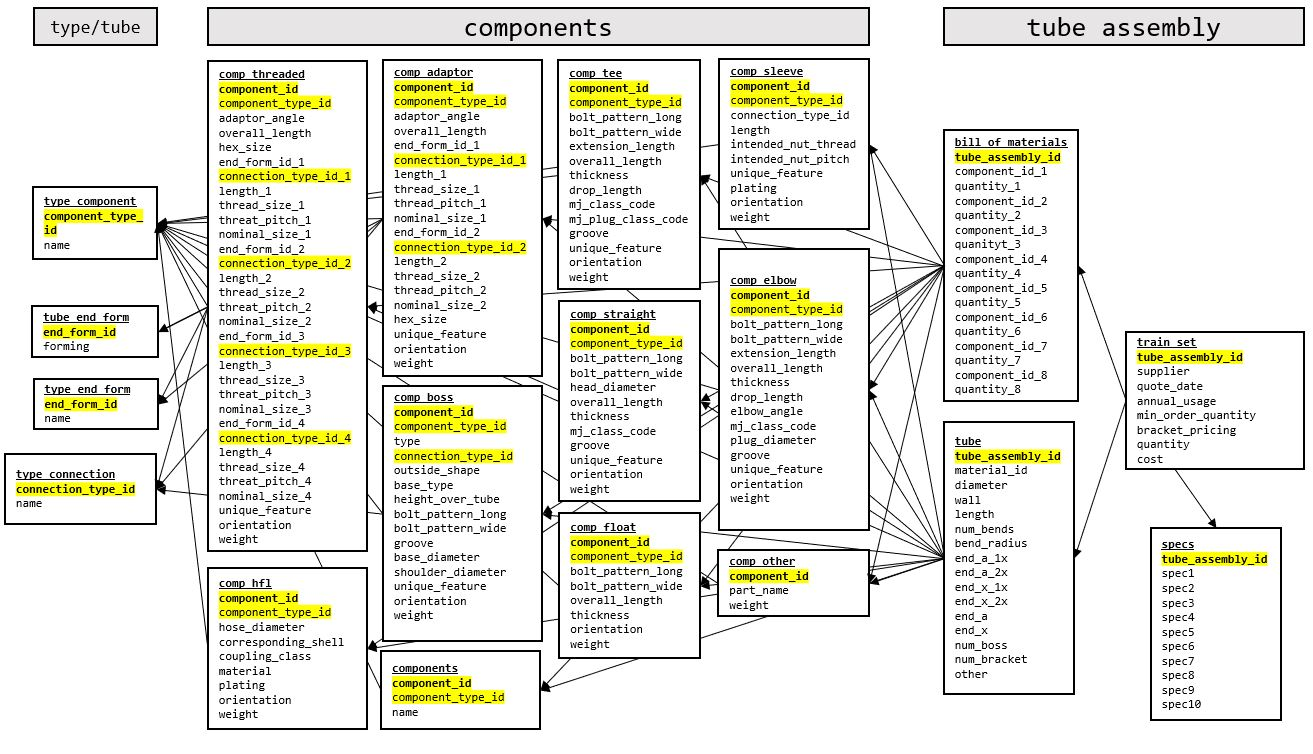

In [7]:
Image(filename='C:\\Users\\Casey\\Desktop\\Capstone Project\\Schema.jpg') 

# Exploratory Data Analysis

** Continuous Feature Data Visualizations **

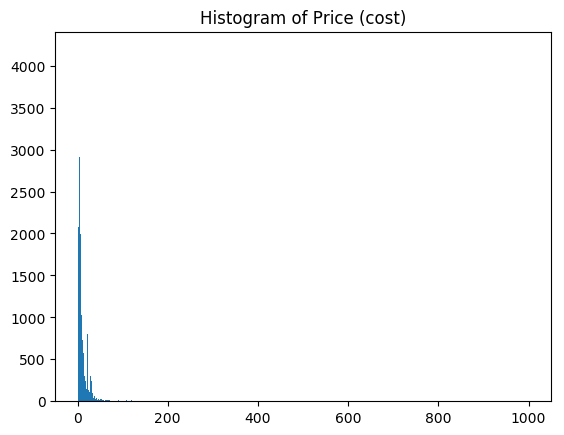

In [8]:
plt.hist(train_set['cost'],bins=1000)
plt.title('Histogram of Price (cost)')
plt.show()

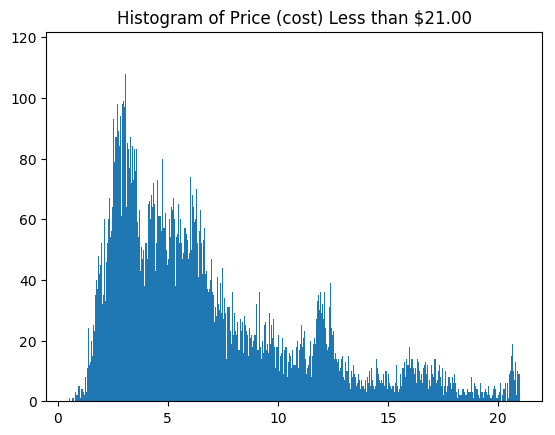

In [9]:
plt.hist(train_set['cost'][train_set['cost']<21],bins=1000)
plt.title('Histogram of Price (cost) Less than $21.00')
plt.show()

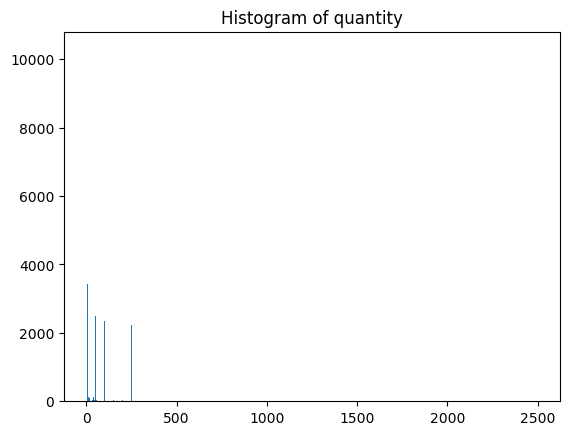

In [10]:
plt.hist(train_set['quantity'],bins=1000)
plt.title('Histogram of quantity')
plt.show()

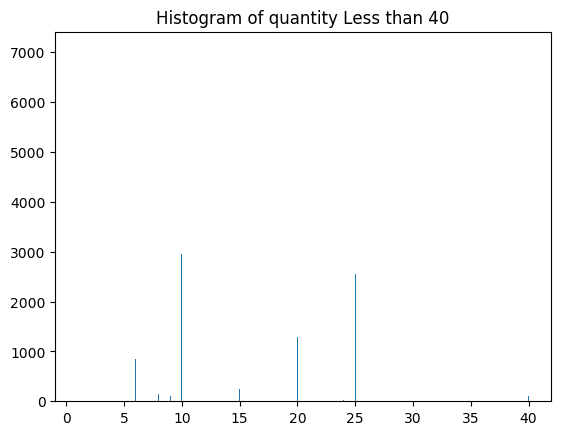

In [11]:
plt.hist(train_set['quantity'][train_set.quantity<=40],bins=1000)
plt.title('Histogram of quantity Less than 40')
plt.show()

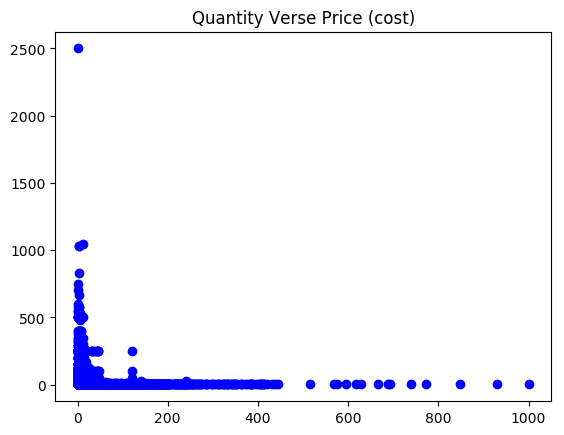

In [12]:
plt.scatter(train_set['cost'],train_set['quantity'],c='blue')
plt.title('Quantity Verse Price (cost)')
plt.show()

In [13]:
#bins = [0,500,1000,5000,10000,15000]
#annual_usage_counts=pd.cut(train_set['annual_usage'],bins)
#annual_usage_counts.value_counts()

In [14]:
#bins = [0,100,200,300,400,500]
#min_order_counts=pd.cut(train_set['min_order_quantity'],bins)
#in_order_counts.value_counts()

#Even though the maximum values looked suspicious in the 5 number summaries, a closer look reveals that some values might be outliers but do not seem erroneous.

In [15]:
## comp_adaptor
#comp_adaptor.describe()

In [16]:
# comp_adaptor
#comp_adaptor['thread_size_2'].value_counts()

In [17]:
# comp_adaptor
#comp_adaptor['thread_pitch_2'].value_counts()
#Thread size number 2 and thread pitch number 2 each have a single erroneous value of 9999, to be replaced with NaN

In [18]:
# tube table
#tube.describe()

In [19]:
# tube table
#tube['num_boss'].value_counts()

In [20]:
# tube table
#tube['num_bracket'].value_counts()

In [21]:
# tube table
#tube['other'].value_counts()

In [22]:
# bill_of_materials
#bill_of_materials.describe()
#bill_of_materials.head(10)

In [23]:
# comp_boss
#comp_boss.describe()
#bins = [0,25,50,75,100,1000,9999]
#height_counts=pd.cut(comp_boss['height_over_tube'],bins)
#height_counts.value_counts()

In [24]:
#comp_boss.describe()
#Looks to me that the 999 value is erroneous, but shouldn't be mean or median imputed.  This is a feature of a particular component, but still continous.  Change to NaN or Null.

In [25]:
# comp_hfl
#comp_hfl.describe()

In [26]:
#comp_sleeve
#comp_sleeve.describe()
#Change the 9999 values to NaN

In [27]:
# comp_elbow
#comp_elbow.describe()
#bins = [0,25,50,75,100,9999]
#elbow_counts=pd.cut(comp_elbow['drop_length'],bins)
#elbow_counts.value_counts()
#Change the 9999 values to NaN.

In [28]:
# comp_tee
#comp_tee.describe()

In [29]:
# comp_straight
#comp_straight.describe()

In [30]:
# comp_other
#comp_other.describe()

In [31]:
# comp_float
#comp_float.describe()

In [32]:
# comp_threaded
#comp_threaded.describe()
#bins = [0,25,50,100,9999]
#threaded_counts=pd.cut(comp_threaded['nominal_size_3'],bins)
#threaded_counts.value_counts()
#Nominal size 4 has no values contained in it.  Nominal size 3 and size 2 has a maximum value of 9999.

In [33]:
# comp_threaded
#bins = [0,25,50,100,9999]
#threaded_counts=pd.cut(comp_threaded['nominal_size_2'],bins)
#threaded_counts.value_counts()
#Switch the 9999 value to NaN

# Exploratory Data Analysis Summary

There are many tables, many features in each table, and a somewhat complicated relationship among the tables.  The training dataset can be connected to the remaining features contained in other tables through key relationships between tables.  There are features that simply describe features of tube components with labels.  Others have have a continuous scale but the frequency is so small that they can be changed to indicator variables in another table.  A few columns had erroneous values that are likely there as a placeholder when no number is available or unecessary.  They are all contained in tables that describe attritubes of tubes using tables, so I'm going to impute those with NaN/Nulls.  

# Modeling Price With 'train_set'
** 'train_set' Preprocessing **

In [5]:
std_scaler = StandardScaler()
train_set_num = train_set.drop(['bracket_pricing','tube_assembly_id','supplier','quote_date'],axis=1)
bracket_pricing_ind = pd.get_dummies(train_set.bracket_pricing,drop_first=True)
supplier_ind = pd.get_dummies(train_set.supplier)
df=pd.DataFrame(std_scaler.fit_transform(train_set_num))
df.columns = train_set_num.columns + '_std_scaled'
train = pd.concat([df.reset_index(drop=True),bracket_pricing_ind,supplier_ind],axis=1)

In [6]:
# Split training dataset into 'train' and 'test'

price = train.cost_std_scaled
features = train.drop('cost_std_scaled',axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.20, random_state=42)

print("Training and testing split was successful.")

Training and testing split was successful.


** Modeling Price Using 'train_set' **

In [36]:
#All zeros
all_zeros_mse = mean_squared_error(np.zeros(6043),y_test)

#Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
linear_regression_mse_train=mean_squared_error(y_train,lin_reg.predict(X_train))
linear_regression_mse_valid=mean_squared_error(y_test,lin_reg.predict(X_test))

#Support Vector Regressor
svm_reg = SVR()
svm_reg.fit(X_train,y_train)
svm_mse_train=mean_squared_error(y_train,svm_reg.predict(X_train))
svm_mse_valid=mean_squared_error(y_test,svm_reg.predict(X_test))

#Random Forest Regressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train,y_train)
random_forest_model_mse_train = mean_squared_error(y_train,random_forest_model.predict(X_train))
random_forest_model_mse_valid = mean_squared_error(y_test,random_forest_model.predict(X_test))

#Decision Tree Regressor
dec_tree_model = DecisionTreeRegressor()

param_grid = [
 {'min_samples_split': [2,5,10], 'max_depth': [2,4,5,8],'min_samples_leaf': [1,2,4,10]}
]

grid_search = GridSearchCV(dec_tree_model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train,y_train)

dec_tree_model = grid_search.best_estimator_
dec_tree_model_mse_train = mean_squared_error(y_train,dec_tree_model.predict(X_train))
dec_tree_model_mse_valid = mean_squared_error(y_test,dec_tree_model.predict(X_test))

#Neural Network Regressor (Using sklearn), One layer of 100 hidden nodes
NN_sklearn = MLPRegressor(solver='sgd',hidden_layer_sizes=(100))
NN_sklearn.fit(X_train,y_train)
NN_sklearn_mse_train = mean_squared_error(y_train,NN_sklearn.predict(X_train))
NN_sklearn_mse_valid = mean_squared_error(y_test,NN_sklearn.predict(X_test))

In [37]:
#Neural Network Regressor (Using Keras)

model=Sequential()
model.add(Dense(100,activation='relu',input_dim=61))
model.add(Dropout(0.10))
model.add(Dense(75,activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(50,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))
model.summary()
model.compile(loss='mean_squared_error', optimizer='rmsprop')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               6200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 75)                7575      
_________________________________________________________________
dropout_2 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                3800      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total para

In [38]:
X = X_train.as_matrix()
y = y_train.as_matrix()
model.fit(X,y,epochs=10,batch_size=10)
NN_keras_mse_train = mean_squared_error(y_train.as_matrix(),model.predict(X_train.as_matrix()))
NN_keras_mse_valid = mean_squared_error(y_test.as_matrix(),model.predict(X_test.as_matrix()))

Epoch 1/10
24170/24170 [==============================] - 4s - loss: 0.8860     
Epoch 2/10
24170/24170 [==============================] - 3s - loss: 0.8547     
Epoch 3/10
24170/24170 [==============================] - 3s - loss: 0.8356     
Epoch 4/10
24170/24170 [==============================] - 3s - loss: 0.8317     
Epoch 5/10
24170/24170 [==============================] - 3s - loss: 0.8225     
Epoch 6/10
24170/24170 [==============================] - 3s - loss: 0.8091     
Epoch 7/10
24170/24170 [==============================] - 3s - loss: 0.8116     
Epoch 8/10
24170/24170 [==============================] - 3s - loss: 0.7933     
Epoch 9/10
24170/24170 [==============================] - 3s - loss: 0.7896     
Epoch 10/10
24170/24170 [==============================] - 3s - loss: 0.7923     


In [39]:
train_mse_dict = dict({'All Zeros': (all_zeros_mse),
               'Neural Network Keras':NN_keras_mse_train,
               'Neural Network sklearn':NN_sklearn_mse_train,
               'Decision Tree':dec_tree_model_mse_train,
               'Random Forest':random_forest_model_mse_train,
               'Linear Regression':linear_regression_mse_train
               })
train_mse_dict

{'All Zeros': 0.81801792970401255,
 'Decision Tree': 0.55148658297535413,
 'Linear Regression': 0.90837288822169038,
 'Neural Network Keras': 0.80164237157015883,
 'Neural Network sklearn': 0.79155984021165926,
 'Random Forest': 0.42699315179403496}

In [40]:
valid_mse_dict = dict({'All Zeros': (all_zeros_mse),
               'Neural Network Keras':NN_keras_mse_valid,
               'Neural Network sklearn':NN_sklearn_mse_valid,
               'Decision Tree':dec_tree_model_mse_valid,
               'Random Forest':random_forest_model_mse_valid,
               'Linear Regression':linear_regression_mse_valid
               })
valid_mse_dict

{'All Zeros': 0.81801792970401255,
 'Decision Tree': 0.42382860812672968,
 'Linear Regression': 2.5616117774182367e+19,
 'Neural Network Keras': 0.5948517808206979,
 'Neural Network sklearn': 0.58688461476037879,
 'Random Forest': 0.42190440884691133}

The random forest regressor model performed best on the test data set using the MSE.

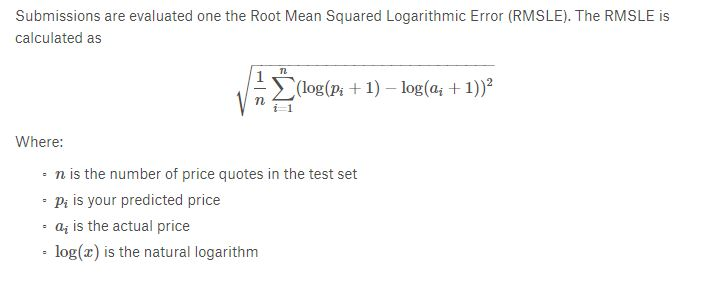

In [41]:
Image(filename='C:\\Users\\Casey\\Desktop\\Capstone Project\\RMSLE.jpg') 

In [42]:
mean_ = train_set.cost.mean()
std_ = train_set.cost.std()

all_zeros_rmsle=rmsle(np.zeros(6043),
      std_scaler_inverse(y_test,mean_,std_)
     )

random_forest_rmsle=rmsle(
    std_scaler_inverse(random_forest_model.predict(X_test),mean_,std_),
    std_scaler_inverse(y_test,mean_,std_)
)

rmsle_dict = dict({'All Zeros':all_zeros_rmsle,'Random Forest':random_forest_rmsle})
rmsle_dict

{'All Zeros': 2.3525028280757914, 'Random Forest': 0.4588216208886573}

# 'test_set' Scoring For Kaggle

In [43]:
test_set_num = test_set.drop(['bracket_pricing','tube_assembly_id','supplier','quote_date'],axis=1)
bracket_pricing_ind = pd.get_dummies(test_set.bracket_pricing,drop_first=True)
supplier_ind = pd.get_dummies(test_set.supplier)
df=pd.DataFrame(std_scaler.fit_transform(test_set_num))
df.columns = test_set_num.columns + '_std_scaled'
test = pd.concat([df.reset_index(drop=True),bracket_pricing_ind,supplier_ind],axis=1)

In [44]:
# For output to put onto Kaggle website for scoring:

# predictions=std_scaler_inverse(random_forest_model.predict(test),mean_,std_)
#my_df = pd.DataFrame(predictions)
#my_df.to_csv('whorton_predictions.csv', index=False, header=False)

# 'train_set' Modeling Summary

Using only features given along with the price target variable we are already able to beat the 'all-zeros' benchmark model with nearly all algorithms examined so far.  Tuning of hyperparameters can result in a better fit of price.

With a score 0f 0.91, the random forest model is obviously better than predicting all zeros for the price of a tube assembly.  This model does not incorporate any data on the components, and could be improved by adding more relevant features or fine-tuning the models a bit more.

# Incorporating Tube Assembly and Specifications In Modeling Price

** Data Preprocessing **

** specs table **

The 'specs' table has the specifications of each tube assembly.  There could be up to 10 specifications for a single tube assembly.  This table can be converted to a indicator variable table with the **tube_assembly_id** as the key.

In [5]:
specs_pre=pd.concat(
    [specs['tube_assembly_id'],
           pd.get_dummies(specs[['spec1','spec2','spec3','spec4','spec5','spec6','spec7','spec8']], drop_first=True,)],
          axis=1
)

** tube table **

The 'tube' table with info on each tube assembly has several continuous inputs and 'end' specs which will be converted to indicator variables.  The **tube_assembly_id** will be the key.

In [6]:
column_names = ['end_a_1x','end_a_2x','end_x_1x','end_x_2x','end_a','end_x']
tube1 = pd.DataFrame(tube.drop(column_names,axis=1))
tube1 = pd.DataFrame(tube1.drop('material_id',axis=1))
tube2 = pd.get_dummies(tube[column_names],drop_first=True)
tube_pre=pd.concat([tube1.reset_index(drop=True),tube2],axis=1)

** Table Mergers **

Merge 1: Left Outer Join between 'train' and the 'specs_pre' table based on the tube_assembly_id
Merge 2: Left Outer Join between 'Merge 1' and the 'tube_pre' table based on the tube_assembly_id

Repeat Merge 1 and Merge 2 with the 'test' table

In [47]:
std_scaler = StandardScaler()
train_set_num = train_set.drop(['bracket_pricing','tube_assembly_id','supplier','quote_date'],axis=1)
bracket_pricing_ind = pd.get_dummies(train_set.bracket_pricing,drop_first=True)
supplier_ind = pd.get_dummies(train_set.supplier)
df=pd.DataFrame(std_scaler.fit_transform(train_set_num))
df.columns = train_set_num.columns + '_std_scaled'
train = pd.concat([df.reset_index(drop=True),bracket_pricing_ind,supplier_ind],axis=1)
tube_assembly_df = pd.DataFrame(train_set.tube_assembly_id)
train=pd.concat([tube_assembly_df,train],axis=1)
df=pd.merge(train,tube_pre,on='tube_assembly_id')
train = pd.merge(df,specs_pre).drop('tube_assembly_id',axis=1)

In [48]:
# Split training dataset into 'train' and 'test'

price = train.cost_std_scaled
features = train.drop('cost_std_scaled',axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.20, random_state=42)

print("Training and testing split was successful.")

Training and testing split was successful.


In [49]:
#All zeros
all_zeros_mse = mean_squared_error(np.zeros(6043),y_test)

#Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
linear_regression_mse_train=mean_squared_error(y_train,lin_reg.predict(X_train))
linear_regression_mse_valid=mean_squared_error(y_test,lin_reg.predict(X_test))

#Support Vector Regressor
svm_reg = SVR()
svm_reg.fit(X_train,y_train)
svm_mse_train=mean_squared_error(y_train,svm_reg.predict(X_train))
svm_mse_valid=mean_squared_error(y_test,svm_reg.predict(X_test))

#Random Forest Regressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train,y_train)
random_forest_model_mse_train = mean_squared_error(y_train,random_forest_model.predict(X_train))
random_forest_model_mse_valid = mean_squared_error(y_test,random_forest_model.predict(X_test))

#Decision Tree Regressor
dec_tree_model = DecisionTreeRegressor()

param_grid = [
 {'min_samples_split': [2,5,10], 'max_depth': [2,4,5,8],'min_samples_leaf': [1,2,4,10]}
]

grid_search = GridSearchCV(dec_tree_model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train,y_train)

dec_tree_model = grid_search.best_estimator_
dec_tree_model_mse_train = mean_squared_error(y_train,dec_tree_model.predict(X_train))
dec_tree_model_mse_valid = mean_squared_error(y_test,dec_tree_model.predict(X_test))

#Neural Network Regressor (Using sklearn), One layer of 100 hidden nodes
NN_sklearn = MLPRegressor(solver='sgd',hidden_layer_sizes=(100))
NN_sklearn.fit(X_train,y_train)
NN_sklearn_mse_train = mean_squared_error(y_train,NN_sklearn.predict(X_train))
NN_sklearn_mse_valid = mean_squared_error(y_test,NN_sklearn.predict(X_test))

In [50]:
#Neural Network Regressor (Using Keras)

model=Sequential()
model.add(Dense(100,activation='relu',input_dim=376))
model.add(Dropout(0.10))
model.add(Dense(75,activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(50,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))
model.summary()
model.compile(loss='mean_squared_error', optimizer='rmsprop')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               37700     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 75)                7575      
_________________________________________________________________
dropout_4 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                3800      
_________________________________________________________________
dense_9 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total para

In [51]:
X = X_train.as_matrix()
y = y_train.as_matrix()
model.fit(X,y,epochs=10,batch_size=10)
NN_keras_mse_train = mean_squared_error(y_train.as_matrix(),model.predict(X_train.as_matrix()))
NN_keras_mse_valid = mean_squared_error(y_test.as_matrix(),model.predict(X_test.as_matrix()))

Epoch 1/10
24170/24170 [==============================] - 11s - loss: 1.4160    
Epoch 2/10
24170/24170 [==============================] - 8s - loss: 1.4102     
Epoch 3/10
24170/24170 [==============================] - 10s - loss: 0.9722    
Epoch 4/10
24170/24170 [==============================] - 7s - loss: 0.8881     
Epoch 5/10
24170/24170 [==============================] - 12s - loss: 0.8512    - ETA: 0s - loss: 0.85
Epoch 6/10
24170/24170 [==============================] - 6s - loss: 0.7987     
Epoch 7/10
24170/24170 [==============================] - 7s - loss: 0.7782     
Epoch 8/10
24170/24170 [==============================] - 12s - loss: 0.8081    
Epoch 9/10
24170/24170 [==============================] - 7s - loss: 0.7934     
Epoch 10/10
24170/24170 [==============================] - 10s - loss: 0.7988    


In [52]:
train_mse_dict = dict({'All Zeros': (all_zeros_mse),
               'Neural Network Keras':NN_keras_mse_train,
               'Neural Network sklearn':NN_sklearn_mse_train,
               'Decision Tree':dec_tree_model_mse_train,
               'Random Forest':random_forest_model_mse_train,
               'Linear Regression':linear_regression_mse_train
               })
train_mse_dict

{'All Zeros': 0.81801792970401255,
 'Decision Tree': 0.33375833886838191,
 'Linear Regression': 0.56970981082861749,
 'Neural Network Keras': 0.69149231292865609,
 'Neural Network sklearn': 1.0434217511487462,
 'Random Forest': 0.052252905655372356}

In [53]:
valid_mse_dict = dict({'All Zeros': (all_zeros_mse),
               'Neural Network Keras':NN_keras_mse_valid,
               'Neural Network sklearn':NN_sklearn_mse_valid,
               'Decision Tree':dec_tree_model_mse_valid,
               'Random Forest':random_forest_model_mse_valid,
               'Linear Regression':linear_regression_mse_valid
               })
valid_mse_dict

{'All Zeros': 0.81801792970401255,
 'Decision Tree': 0.34480388427470027,
 'Linear Regression': 1708228598080.9241,
 'Neural Network Keras': 0.50986590525590825,
 'Neural Network sklearn': 0.81700526831299447,
 'Random Forest': 0.17215673841235946}

In [54]:
test_set_num = test_set.drop(['bracket_pricing','tube_assembly_id','supplier','quote_date'],axis=1)
bracket_pricing_ind = pd.get_dummies(test_set.bracket_pricing,drop_first=True)
supplier_ind = pd.get_dummies(test_set.supplier)
df=pd.DataFrame(std_scaler.fit_transform(test_set_num))
df.columns = test_set_num.columns + '_std_scaled'
test = pd.concat([df.reset_index(drop=True),bracket_pricing_ind,supplier_ind],axis=1)
tube_assembly_df = pd.DataFrame(test_set.tube_assembly_id)
test=pd.concat([tube_assembly_df,test],axis=1)
df=pd.merge(test,tube_pre,on='tube_assembly_id')
test = pd.merge(df,specs_pre).drop('tube_assembly_id',axis=1)

In [55]:
mean_ = train_set.cost.mean()
std_ = train_set.cost.std()

all_zeros_rmsle=rmsle(np.zeros(6043),
      std_scaler_inverse(y_test,mean_,std_)
     )

random_forest_rmsle=rmsle(
    std_scaler_inverse(random_forest_model.predict(X_test),mean_,std_),
    std_scaler_inverse(y_test,mean_,std_)
)

rmsle_dict = dict({'All Zeros':all_zeros_rmsle,'Random Forest':random_forest_rmsle})
rmsle_dict

{'All Zeros': 2.3525028280757914, 'Random Forest': 0.2945424099823206}

In [56]:
# For output to put onto Kaggle website for scoring:

predictions=std_scaler_inverse(random_forest_model.predict(test),mean_,std_)
my_df = pd.DataFrame(predictions)
my_df.to_csv('whorton_predictions2.csv', index=False, header=False)

0.846 is the new score using this new Random Forest model with added features


# Incorporating Individual Components in Modeling Price

# Component Features

In [7]:
# Table merges for comp_sleeve components, only first 4 component ids need merged with the bill of materials dataset

df  = pd.merge(bill_of_materials,comp_sleeve,left_on='component_id_1',right_on='component_id',how='left')
df2 = pd.merge(df,comp_sleeve,left_on='component_id_2',right_on='component_id',how='left',
               suffixes=('','_2'))
df3 = pd.merge(df2,comp_sleeve,left_on='component_id_3',right_on='component_id',how='left',
               suffixes=('','_3'))
sleeve_merged = pd.merge(df3,comp_sleeve,left_on='component_id_4',right_on='component_id',how='left',
               suffixes=('','_4'))
sleeve_merged=sleeve_merged.replace(9999,np.nan)
sleeve_merged=sleeve_merged.replace(np.nan,0)
comp_sleeve_wt = sleeve_merged.quantity_1*sleeve_merged.weight + sleeve_merged.quantity_2*sleeve_merged.weight_2 + sleeve_merged.quantity_3*sleeve_merged.weight_3 + sleeve_merged.quantity_4*sleeve_merged.weight_4
comp_sleeve_len = sleeve_merged.quantity_1*sleeve_merged.length + sleeve_merged.quantity_2*sleeve_merged.length_2 + sleeve_merged.quantity_3*sleeve_merged.length_3 + sleeve_merged.quantity_4*sleeve_merged.length_4

In [8]:
# Table merges for comp_tee components, only 2 component ids need merged with the bill of materials dataset

df2 = pd.merge(bill_of_materials,comp_tee,left_on='component_id_2',right_on='component_id',how='left')
tee_merged = pd.merge(df2,comp_tee,left_on='component_id_3',right_on='component_id',how='left',
               suffixes=('','_3'))
tee_merged=tee_merged.replace(9999,np.nan)
tee_merged=tee_merged.replace(np.nan,0)
comp_tee_wt = tee_merged.quantity_2*tee_merged.weight + tee_merged.quantity_3*tee_merged.weight_3
comp_tee_len = tee_merged.quantity_2*tee_merged.overall_length + tee_merged.quantity_3*tee_merged.overall_length_3
comp_tee_thick = tee_merged.quantity_2*tee_merged.thickness + tee_merged.quantity_3*tee_merged.thickness_3

In [9]:
# Table merges for comp_float components, only 2 component ids need merged with the bill of materials dataset

df  = pd.merge(bill_of_materials,comp_float,left_on='component_id_1',right_on='component_id',how='left')
df2 = pd.merge(df,comp_float,left_on='component_id_2',right_on='component_id',how='left',
              suffixes=('','_2'))
float_merged = pd.merge(df2,comp_float,left_on='component_id_3',right_on='component_id',how='left',
               suffixes=('','_3'))
float_merged=float_merged.replace(9999,np.nan)
float_merged=float_merged.replace(np.nan,0)
float_merged
comp_float_wt = float_merged.quantity_1*float_merged.weight+float_merged.quantity_2*float_merged.weight_2 + float_merged.quantity_3*float_merged.weight_3
comp_float_thick = float_merged.quantity_1*float_merged.thickness+float_merged.quantity_2*float_merged.thickness_2 + float_merged.quantity_3*float_merged.thickness_3

In [10]:
# Table merges for comp_elbow components, only first 5 component ids need merged with the bill of materials dataset

df  = pd.merge(bill_of_materials,comp_elbow,left_on='component_id_1',right_on='component_id',how='left')
df2 = pd.merge(df,comp_elbow,left_on='component_id_2',right_on='component_id',how='left',
               suffixes=('','_2'))
df3 = pd.merge(df2,comp_elbow,left_on='component_id_3',right_on='component_id',how='left',
               suffixes=('','_3'))
df4 = pd.merge(df3,comp_elbow,left_on='component_id_4',right_on='component_id',how='left',
               suffixes=('','_4'))
elbow_merged = pd.merge(df4,comp_elbow,left_on='component_id_5',right_on='component_id',how='left',
               suffixes=('','_5'))
elbow_merged=elbow_merged.replace(9999,np.nan)
elbow_merged=elbow_merged.replace(np.nan,0)
comp_elbow_wt = elbow_merged.quantity_1*elbow_merged.weight + elbow_merged.quantity_2*elbow_merged.weight_2 + elbow_merged.quantity_3*elbow_merged.weight_3 + elbow_merged.quantity_4*elbow_merged.weight_4 + elbow_merged.quantity_5*elbow_merged.weight_5
comp_elbow_thick = elbow_merged.quantity_1*elbow_merged.thickness + elbow_merged.quantity_2*elbow_merged.thickness_2 + elbow_merged.quantity_3*elbow_merged.thickness_3 + elbow_merged.quantity_4*elbow_merged.thickness_4 + elbow_merged.quantity_5*elbow_merged.thickness_5
comp_elbow_len = elbow_merged.quantity_1*elbow_merged.overall_length + elbow_merged.quantity_2*elbow_merged.overall_length + elbow_merged.quantity_3*elbow_merged.overall_length_3 + elbow_merged.quantity_4*elbow_merged.overall_length_4 + elbow_merged.quantity_5*elbow_merged.overall_length_5

In [11]:
# Table merges for comp_other components, all component ids need merged with the bill of materials dataset

df  = pd.merge(bill_of_materials,comp_other,left_on='component_id_1',right_on='component_id',how='left')
df2 = pd.merge(df,comp_other,left_on='component_id_2',right_on='component_id',how='left',
               suffixes=('','_2'))
df3 = pd.merge(df2,comp_other,left_on='component_id_3',right_on='component_id',how='left',
               suffixes=('','_3'))
df4 = pd.merge(df3,comp_other,left_on='component_id_4',right_on='component_id',how='left',
               suffixes=('','_4'))
df5 = pd.merge(df4,comp_other,left_on='component_id_5',right_on='component_id',how='left',
               suffixes=('','_5'))
df6 = pd.merge(df5,comp_other,left_on='component_id_6',right_on='component_id',how='left',
               suffixes=('','_6'))
df7 = pd.merge(df6,comp_other,left_on='component_id_7',right_on='component_id',how='left',
               suffixes=('','_7'))
other_merged = pd.merge(df7,comp_other,left_on='component_id_8',right_on='component_id',how='left',
               suffixes=('','_8'))
other_merged=other_merged.replace(np.nan,0)
comp_other_wt = other_merged.quantity_1*other_merged.weight + other_merged.quantity_2*other_merged.weight_2 + other_merged.quantity_3*other_merged.weight_3 + other_merged.quantity_4*other_merged.weight_4 + other_merged.quantity_5*other_merged.weight_5 + other_merged.quantity_6*other_merged.weight_6 + other_merged.quantity_7*other_merged.weight_7 + other_merged.quantity_8*other_merged.weight_8

In [12]:
# Table merges for comp_straight components, only first 6 component ids need merged with the bill of materials dataset

df  = pd.merge(bill_of_materials,comp_straight,left_on='component_id_1',right_on='component_id',how='left')
df2 = pd.merge(df,comp_straight,left_on='component_id_2',right_on='component_id',how='left',
               suffixes=('','_2'))
df3 = pd.merge(df2,comp_straight,left_on='component_id_3',right_on='component_id',how='left',
               suffixes=('','_3'))
df4 = pd.merge(df3,comp_straight,left_on='component_id_4',right_on='component_id',how='left',
               suffixes=('','_4'))
df5 = pd.merge(df4,comp_straight,left_on='component_id_5',right_on='component_id',how='left',
               suffixes=('','_5'))
straight_merged = pd.merge(df5,comp_straight,left_on='component_id_6',right_on='component_id',how='left',
               suffixes=('','_6'))
straight_merged=straight_merged.replace(9999,0)
straight_merged=straight_merged.replace(np.nan,0)
comp_straight_wt = straight_merged.quantity_1*straight_merged.weight + straight_merged.quantity_2*straight_merged.weight_2 + straight_merged.quantity_3*straight_merged.weight_3 + straight_merged.quantity_4*straight_merged.weight_4 + straight_merged.quantity_5*straight_merged.weight_5+ straight_merged.quantity_6*straight_merged.weight_6
comp_straight_len = straight_merged.quantity_1*straight_merged.overall_length + straight_merged.quantity_2*straight_merged.overall_length_2 + straight_merged.quantity_3*straight_merged.overall_length_3 + straight_merged.quantity_4*straight_merged.overall_length_4 + straight_merged.quantity_5*straight_merged.overall_length_5+ straight_merged.quantity_6*straight_merged.overall_length_6
comp_straight_thick = straight_merged.quantity_1*straight_merged.thickness + straight_merged.quantity_2*straight_merged.thickness_2 + straight_merged.quantity_3*straight_merged.thickness_3 + straight_merged.quantity_4*straight_merged.thickness_4 + straight_merged.quantity_5*straight_merged.thickness_5+ straight_merged.quantity_6*straight_merged.thickness_6

In [13]:
# Table merges for comp_adaptor components, only first 5 component ids need merged with the bill of materials dataset

df  = pd.merge(bill_of_materials,comp_adaptor,left_on='component_id_1',right_on='component_id',how='left')
df2 = pd.merge(df,comp_adaptor,left_on='component_id_2',right_on='component_id',how='left',
               suffixes=('','_2'))
df3 = pd.merge(df2,comp_adaptor,left_on='component_id_3',right_on='component_id',how='left',
               suffixes=('','_3'))
df4 = pd.merge(df3,comp_adaptor,left_on='component_id_4',right_on='component_id',how='left',
               suffixes=('','_4'))
adaptor_merged = pd.merge(df4,comp_adaptor,left_on='component_id_5',right_on='component_id',how='left',
               suffixes=('','_5'))
adaptor_merged=adaptor_merged.replace(9999,np.nan)
adaptor_merged=adaptor_merged.replace(np.nan,0)
comp_adaptor_wt = adaptor_merged.quantity_1*adaptor_merged.weight + adaptor_merged.quantity_2*adaptor_merged.weight_2 + adaptor_merged.quantity_3*adaptor_merged.weight_3 + adaptor_merged.quantity_4*adaptor_merged.weight_4 + adaptor_merged.quantity_5*adaptor_merged.weight_5
comp_adaptor_len = adaptor_merged.quantity_1*adaptor_merged.overall_length + adaptor_merged.quantity_2*adaptor_merged.overall_length_2 + adaptor_merged.quantity_3*adaptor_merged.overall_length_3 + adaptor_merged.quantity_4*adaptor_merged.overall_length_4 + adaptor_merged.quantity_5*adaptor_merged.overall_length_5

In [14]:
# Table merges for comp_boss components, only first 6 component ids need merged with the bill of materials dataset

df  = pd.merge(bill_of_materials,comp_boss,left_on='component_id_1',right_on='component_id',how='left')
df2 = pd.merge(df,comp_boss,left_on='component_id_2',right_on='component_id',how='left',
               suffixes=('','_2'))
df3 = pd.merge(df2,comp_boss,left_on='component_id_3',right_on='component_id',how='left',
               suffixes=('','_3'))
df4 = pd.merge(df3,comp_boss,left_on='component_id_4',right_on='component_id',how='left',
               suffixes=('','_4'))
df5 = pd.merge(df4,comp_boss,left_on='component_id_5',right_on='component_id',how='left',
               suffixes=('','_5'))
boss_merged = pd.merge(df5,comp_boss,left_on='component_id_6',right_on='component_id',how='left',
               suffixes=('','_6'))
boss_merged=boss_merged.replace(np.nan,0)
comp_boss_wt = boss_merged.quantity_1*boss_merged.weight + boss_merged.quantity_2*boss_merged.weight_2 + boss_merged.quantity_3*boss_merged.weight_3 + boss_merged.quantity_4*boss_merged.weight_4 + boss_merged.quantity_5*boss_merged.weight_5+ boss_merged.quantity_6*boss_merged.weight_6


In [15]:
# Table merges for comp_threaded components, only first 6 component ids need merged with the bill of materials dataset

df  = pd.merge(bill_of_materials,comp_threaded,left_on='component_id_1',right_on='component_id',how='left')
df2 = pd.merge(df,comp_threaded,left_on='component_id_2',right_on='component_id',how='left',
               suffixes=('','_2'))
df3 = pd.merge(df2,comp_threaded,left_on='component_id_3',right_on='component_id',how='left',
               suffixes=('','_3'))
df4 = pd.merge(df3,comp_threaded,left_on='component_id_4',right_on='component_id',how='left',
               suffixes=('','_4'))
df5 = pd.merge(df4,comp_threaded,left_on='component_id_5',right_on='component_id',how='left',
               suffixes=('','_5'))
threaded_merged = pd.merge(df5,comp_threaded,left_on='component_id_6',right_on='component_id',how='left',
               suffixes=('','_6'))
threaded_merged=threaded_merged.replace(9999,np.nan)
threaded_merged=threaded_merged.replace(np.nan,0)
comp_threaded_wt = threaded_merged.quantity_1*threaded_merged.weight + threaded_merged.quantity_2*threaded_merged.weight_2 + threaded_merged.quantity_3*threaded_merged.weight_3 + threaded_merged.quantity_4*threaded_merged.weight_4 + threaded_merged.quantity_5*threaded_merged.weight_5+ threaded_merged.quantity_6*threaded_merged.weight_6
comp_threaded_len = threaded_merged.quantity_1*threaded_merged.overall_length + threaded_merged.quantity_2*threaded_merged.overall_length_2 + threaded_merged.quantity_3*threaded_merged.overall_length_3 + threaded_merged.quantity_4*threaded_merged.overall_length_4 + threaded_merged.quantity_5*threaded_merged.overall_length_5+ threaded_merged.quantity_6*threaded_merged.overall_length_6

In [16]:
# Table merges for comp_hfl components, only 2 component ids need merged with the bill of materials dataset

df3 = pd.merge(bill_of_materials,comp_hfl,left_on='component_id_3',right_on='component_id',how='left')
df4 = pd.merge(df3,comp_hfl,left_on='component_id_4',right_on='component_id',how='left',
               suffixes=('','_4'))
hfl_merged = pd.merge(df4,comp_hfl,left_on='component_id_5',right_on='component_id',how='left',
               suffixes=('','_5'))
hfl_merged=hfl_merged.replace(np.nan,0)
comp_hfl_wt = hfl_merged.quantity_2*hfl_merged.weight + hfl_merged.quantity_4*hfl_merged.weight_4 + hfl_merged.quantity_5*hfl_merged.weight_5

In [17]:
std_scaler = StandardScaler()
components_df = pd.DataFrame(
    {    
    'comp_hfl':(comp_hfl_wt),
    'comp_threaded_wt':comp_threaded_wt,
    'comp_threaded_len':comp_threaded_len,
    'comp_boss_wt':comp_boss_wt,
    'comp_adaptor_wt':comp_adaptor_wt,
    'comp_adaptor_len':comp_adaptor_len,
    'comp_straight_wt':comp_straight_wt,
    'comp_straight_len':comp_straight_len,
    'comp_straight_thick':comp_straight_thick,
    'comp_other_wt':comp_other_wt,
    'comp_elbow_wt':comp_elbow_wt,
    'comp_elbow_len':comp_elbow_len,
    'comp_elbow_thick':comp_elbow_thick,
    'comp_float_wt':comp_float_wt,
    'comp_float_thick':comp_float_thick,
    'comp_tee_wt':comp_tee_wt,
    'comp_tee_len':comp_tee_len,
    'comp_tee_thick':comp_tee_thick,
    'comp_sleeve_wt':comp_sleeve_wt,
    'comp_sleeve_len':comp_sleeve_len,
    #'tube_assembly_id':bill_of_materials.tube_assembly_id
    }
)
df = pd.DataFrame(std_scaler.fit_transform(components_df))
df.columns = components_df.columns
components_df_std=pd.concat([df,bill_of_materials.tube_assembly_id],axis=1)

In [20]:
std_scaler = StandardScaler()
train_set_num = train_set.drop(['bracket_pricing','tube_assembly_id','supplier','quote_date'],axis=1)
bracket_pricing_ind = pd.get_dummies(train_set.bracket_pricing,drop_first=True)
supplier_ind = pd.get_dummies(train_set.supplier)
df=pd.DataFrame(std_scaler.fit_transform(train_set_num))
df.columns = train_set_num.columns + '_std_scaled'
train = pd.concat([df.reset_index(drop=True),bracket_pricing_ind,supplier_ind],axis=1)
tube_assembly_df = pd.DataFrame(train_set.tube_assembly_id)
train=pd.concat([tube_assembly_df,train],axis=1)
df=pd.merge(train,tube_pre,on='tube_assembly_id')
df=pd.merge(df,components_df_std,on='tube_assembly_id',how='left')
train = pd.merge(df,specs_pre).drop('tube_assembly_id',axis=1)

In [21]:
# Split training dataset into 'train' and 'test'

price = train.cost_std_scaled
features = train.drop('cost_std_scaled',axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.20, random_state=42)

print("Training and testing split was successful.")

Training and testing split was successful.


In [70]:
#All zeros
all_zeros_mse = mean_squared_error(np.zeros(6043),y_test)

#Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
linear_regression_mse_train=mean_squared_error(y_train,lin_reg.predict(X_train))
linear_regression_mse_valid=mean_squared_error(y_test,lin_reg.predict(X_test))

#Support Vector Regressor
svm_reg = SVR()
svm_reg.fit(X_train,y_train)
svm_mse_train=mean_squared_error(y_train,svm_reg.predict(X_train))
svm_mse_valid=mean_squared_error(y_test,svm_reg.predict(X_test))

#Random Forest Regressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train,y_train)
random_forest_model_mse_train = mean_squared_error(y_train,random_forest_model.predict(X_train))
random_forest_model_mse_valid = mean_squared_error(y_test,random_forest_model.predict(X_test))

#Decision Tree Regressor
dec_tree_model = DecisionTreeRegressor()

param_grid = [
 {'min_samples_split': [2,5,10], 'max_depth': [2,4,5,8],'min_samples_leaf': [1,2,4,10]}
]

grid_search = GridSearchCV(dec_tree_model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train,y_train)

dec_tree_model = grid_search.best_estimator_
dec_tree_model_mse_train = mean_squared_error(y_train,dec_tree_model.predict(X_train))
dec_tree_model_mse_valid = mean_squared_error(y_test,dec_tree_model.predict(X_test))

#Neural Network Regressor (Using sklearn), One layer of 100 hidden nodes
NN_sklearn = MLPRegressor(solver='sgd',hidden_layer_sizes=(100))
NN_sklearn.fit(X_train,y_train)
NN_sklearn_mse_train = mean_squared_error(y_train,NN_sklearn.predict(X_train))
NN_sklearn_mse_valid = mean_squared_error(y_test,NN_sklearn.predict(X_test))

In [71]:
train_mse_dict = dict({'All Zeros': (all_zeros_mse),
               'Neural Network Keras':NN_keras_mse_train,
               'Neural Network sklearn':NN_sklearn_mse_train,
               'Decision Tree':dec_tree_model_mse_train,
               'Random Forest':random_forest_model_mse_train,
               'Linear Regression':linear_regression_mse_train
               })
train_mse_dict

{'All Zeros': 0.81801792970401255,
 'Decision Tree': 0.26164942092714022,
 'Linear Regression': 0.52487519744493971,
 'Neural Network Keras': 0.69149231292865609,
 'Neural Network sklearn': 1.0421431588997696,
 'Random Forest': 0.044382518072269998}

In [72]:
valid_mse_dict = dict({'All Zeros': (all_zeros_mse),
               'Neural Network Keras':NN_keras_mse_valid,
               'Neural Network sklearn':NN_sklearn_mse_valid,
               'Decision Tree':dec_tree_model_mse_valid,
               'Random Forest':random_forest_model_mse_valid,
               'Linear Regression':linear_regression_mse_valid
               })
valid_mse_dict

{'All Zeros': 0.81801792970401255,
 'Decision Tree': 0.33679778337962468,
 'Linear Regression': 12355583356404.115,
 'Neural Network Keras': 0.50986590525590825,
 'Neural Network sklearn': 0.81502342790788351,
 'Random Forest': 0.18134583283217029}

In [73]:
mean_ = train_set.cost.mean()
std_ = train_set.cost.std()

all_zeros_rmsle=rmsle(np.zeros(6043),
      std_scaler_inverse(y_test,mean_,std_)
     )

random_forest_rmsle=rmsle(
    std_scaler_inverse(random_forest_model.predict(X_test),mean_,std_),
    std_scaler_inverse(y_test,mean_,std_)
)


rmsle_dict = dict({'All Zeros':all_zeros_rmsle,'Random Forest':random_forest_rmsle})
rmsle_dict

{'All Zeros': 2.3525028280757914, 'Random Forest': 0.2705059100161807}

Some improvement incorporating new features.

In [74]:
std_scaler = StandardScaler()
test_set_num = test_set.drop(['bracket_pricing','tube_assembly_id','supplier','quote_date'],axis=1)
bracket_pricing_ind = pd.get_dummies(test_set.bracket_pricing,drop_first=True)
supplier_ind = pd.get_dummies(test_set.supplier)
df=pd.DataFrame(std_scaler.fit_transform(test_set_num))
df.columns = test_set_num.columns + '_std_scaled'
test = pd.concat([df.reset_index(drop=True),bracket_pricing_ind,supplier_ind],axis=1)
tube_assembly_df = pd.DataFrame(test_set.tube_assembly_id)
test=pd.concat([tube_assembly_df,test],axis=1)
df=pd.merge(test,tube_pre,on='tube_assembly_id')
df=pd.merge(df,components_df_std,on='tube_assembly_id',how='left')
test = pd.merge(df,specs_pre).drop('tube_assembly_id',axis=1)

In [75]:
# For output to put onto Kaggle website for scoring:

predictions=std_scaler_inverse(random_forest_model.predict(test),mean_,std_)
my_df = pd.DataFrame(predictions)
my_df.to_csv('whorton_predictions3.csv', index=False, header=False)

Improved to 0.796455

** Continuous Feature Changes or Imputations **

comp_adaptor:
Thread size number 2 and thread pitch number 2 each have a single erroneous value of 9999, to be replaced with NaN

comp_boss:
Looks to me that the 999 value is erroneous, but shouldn't be mean or median imputed.  This is a feature of a particular component, but still continous.  Change to NaN or Null.

comp_sleeve:
Change the 9999 values to NaN

comp_elbow:
Change the 9999 values to NaN.

comp_threaded:
Nominal size 4 has no values contained in it.  Nominal size 3 and size 2 has a maximum value of 9999.

In [76]:
comp_adaptor.thread_size_2.replace(9999,np.nan,inplace=True)
comp_adaptor.thread_pitch_2.replace(9999,np.nan,inplace=True)
comp_boss.height_over_tube.replace(9999,np.nan,inplace=True)
comp_sleeve.length.replace(9999,np.nan,inplace=True)
comp_elbow.drop_length.replace(9999,np.nan,inplace=True)
comp_threaded.nominal_size_2.replace(9999,np.nan,inplace=True)
comp_threaded.nominal_size_3.replace(9999,np.nan,inplace=True)

In [77]:
tee_comp_ids = list(comp_tee['component_id'])
hfl_comp_ids = list(comp_hfl['component_id'])
other_comp_ids = list(comp_other['component_id'])
boss_comp_ids = list(comp_boss['component_id'])
threaded_comp_ids = list(comp_threaded['component_id'])
sleeve_comp_ids = list(comp_sleeve['component_id'])
straight_comp_ids = list(comp_straight['component_id'])
elbow_comp_ids = list(comp_elbow['component_id'])
adaptor_comp_ids = list(comp_adaptor['component_id'])
float_comp_ids = list(comp_float['component_id'])

allcompsids = list(tee_comp_ids+hfl_comp_ids+other_comp_ids+boss_comp_ids+threaded_comp_ids+sleeve_comp_ids
                  +straight_comp_ids+elbow_comp_ids+adaptor_comp_ids+float_comp_ids)

In [78]:
component_id_list = ("component_id_1","component_id_2","component_id_3","component_id_4",
                    "component_id_5","component_id_6","component_id_7","component_id_8")

component_match_df = pd.DataFrame({'Bill of Materials': component_id_list,
                  'comp_tee': tuple(my_merger(bill_of_materials,comp_tee,component_id_list)),
                  'comp_sleeve': tuple(my_merger(bill_of_materials,comp_sleeve,component_id_list)),
                  'comp_threaded': tuple(my_merger(bill_of_materials,comp_threaded,component_id_list)),
                  'comp_boss': tuple(my_merger(bill_of_materials,comp_boss,component_id_list)),
                  'comp_hfl': tuple(my_merger(bill_of_materials,comp_hfl,component_id_list)),
                  'comp_adaptor': tuple(my_merger(bill_of_materials,comp_adaptor,component_id_list)),
                  'comp_elbow': tuple(my_merger(bill_of_materials,comp_elbow,component_id_list)),
                  'comp_straight': tuple(my_merger(bill_of_materials,comp_straight,component_id_list)),
                   'comp_float': tuple(my_merger(bill_of_materials,comp_float,component_id_list)),
                   'comp_other': tuple(my_merger(bill_of_materials,comp_other,component_id_list))
                  })
component_match_df

,Bill of Materials,comp_adaptor,comp_boss,comp_elbow,comp_float,comp_hfl,comp_other,comp_sleeve,comp_straight,comp_tee,comp_threaded
0,component_id_1,1748,423,299,13,0,1501,1080,1057,0,2055
1,component_id_2,7,169,231,8,0,986,10670,390,4,852
2,component_id_3,2,167,141,10,3,399,525,209,4,3219
3,component_id_4,1,121,12,0,1,117,256,44,0,49
4,component_id_5,1,14,1,0,12,54,0,6,0,4
5,component_id_6,0,3,0,0,0,19,0,1,0,3
6,component_id_7,0,0,0,0,0,7,0,0,0,0
7,component_id_8,0,0,0,0,0,1,0,0,0,0


# Dimension Reduction and Feature Engineering

In [22]:
x=round(X_train.shape[0]*1.0/X_train.shape[1]*1.0,0)
print("Observations per feature: "+str(x))

Observations per feature: 61.0


In [36]:
X_train_num = X_train[[
'annual_usage_std_scaled','min_order_quantity_std_scaled','quantity_std_scaled','diameter','wall',
'length','num_bends','bend_radius','num_boss','num_bracket','other','comp_adaptor_len',
'comp_adaptor_wt','comp_boss_wt','comp_elbow_len','comp_elbow_thick','comp_elbow_wt',
'comp_float_thick','comp_float_wt','comp_hfl','comp_other_wt','comp_sleeve_len',
'comp_sleeve_wt','comp_straight_len','comp_straight_thick','comp_straight_wt',
'comp_tee_len','comp_tee_thick','comp_tee_wt','comp_threaded_len','comp_threaded_wt'
]]

X_test_num = X_test[[
'annual_usage_std_scaled','min_order_quantity_std_scaled','quantity_std_scaled','diameter',
'wall','length','num_bends','bend_radius','num_boss','num_bracket','other','comp_adaptor_len',
'comp_adaptor_wt','comp_boss_wt','comp_elbow_len','comp_elbow_thick','comp_elbow_wt','comp_float_thick',
'comp_float_wt','comp_hfl','comp_other_wt','comp_sleeve_len','comp_sleeve_wt','comp_straight_len',
'comp_straight_thick','comp_straight_wt','comp_tee_len','comp_tee_thick','comp_tee_wt',
'comp_threaded_len','comp_threaded_wt'
]]

In [37]:
X_train_num.shape[1]

31

In [38]:
pca=PCA(n_components=2)
X_train_num2D=pca.fit_transform(X_train_num)
X_train_num2D_transform = pca.fit(X_train_num)
print(pca.explained_variance_ratio_)
princ_comps = pd.DataFrame(X_train_num2D)
princ_comps.columns = ('pc1','pc2')

[ 0.91929139  0.07420404]


In [39]:
df=X_train.drop(X_train_num,axis=1)
df2 = princ_comps
X_train=pd.concat([df.reset_index(),df2],axis=1)
X_train=X_train.drop('index',axis=1)

df=pd.DataFrame(X_test.drop(X_test_num,axis=1))
princ_comps2 = pd.DataFrame(X_train_num2D_transform.transform(X_test_num))
princ_comps2.columns= ('pc1','pc2')
df2 = princ_comps2
X_test=pd.concat([df.reset_index(),df2],axis=1)
X_test=X_test.drop('index',axis=1)

In [40]:
X_train.shape

(24170, 367)

In [83]:
#All zeros
all_zeros_mse = mean_squared_error(np.zeros(6043),y_test)

#Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
linear_regression_mse_train=mean_squared_error(y_train,lin_reg.predict(X_train))
linear_regression_mse_valid=mean_squared_error(y_test,lin_reg.predict(X_test))

#Support Vector Regressor
svm_reg = SVR()
svm_reg.fit(X_train,y_train)
svm_mse_train=mean_squared_error(y_train,svm_reg.predict(X_train))
svm_mse_valid=mean_squared_error(y_test,svm_reg.predict(X_test))

#Random Forest Regressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train,y_train)
random_forest_model_mse_train = mean_squared_error(y_train,random_forest_model.predict(X_train))
random_forest_model_mse_valid = mean_squared_error(y_test,random_forest_model.predict(X_test))

#Decision Tree Regressor
dec_tree_model = DecisionTreeRegressor()

param_grid = [
 {'min_samples_split': [2,5,10], 'max_depth': [2,4,5,8],'min_samples_leaf': [1,2,4,10]}
]

grid_search = GridSearchCV(dec_tree_model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train,y_train)

dec_tree_model = grid_search.best_estimator_
dec_tree_model_mse_train = mean_squared_error(y_train,dec_tree_model.predict(X_train))
dec_tree_model_mse_valid = mean_squared_error(y_test,dec_tree_model.predict(X_test))

#Neural Network Regressor (Using sklearn), One layer of 100 hidden nodes
NN_sklearn = MLPRegressor(hidden_layer_sizes=(100))
NN_sklearn.fit(X_train,y_train)
NN_sklearn_mse_train = mean_squared_error(y_train.as_matrix(),NN_sklearn.predict(X_train.as_matrix()))
NN_sklearn_mse_valid = mean_squared_error(y_test.as_matrix(),NN_sklearn.predict(X_test.as_matrix()))

In [84]:
#Neural Network Regressor (Using Keras)

model=Sequential()
model.add(Dense(100,activation='relu',input_dim=367))
model.add(Dropout(0.10))
model.add(Dense(75,activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(50,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))
model.summary()
model.compile(loss='mean_squared_error', optimizer='rmsprop')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               36800     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 75)                7575      
_________________________________________________________________
dropout_6 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 50)                3800      
_________________________________________________________________
dense_14 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 21        
Total para

In [85]:
X = X_train.as_matrix()
y = y_train.as_matrix()
model.fit(X,y,epochs=10,batch_size=10)
NN_keras_mse = mean_squared_error(y_test.as_matrix(),model.predict(X_test.as_matrix()))

Epoch 1/10
24170/24170 [==============================] - 5s - loss: 7.6189     
Epoch 2/10
24170/24170 [==============================] - 4s - loss: 3.6920     
Epoch 3/10
24170/24170 [==============================] - 4s - loss: 3.3977     
Epoch 4/10
24170/24170 [==============================] - 4s - loss: 2.3325     
Epoch 5/10
24170/24170 [==============================] - 4s - loss: 6.2374     
Epoch 6/10
24170/24170 [==============================] - 4s - loss: 4.6369     
Epoch 7/10
24170/24170 [==============================] - 4s - loss: 13.5120     
Epoch 8/10
24170/24170 [==============================] - 4s - loss: 1.8681     
Epoch 9/10
24170/24170 [==============================] - 4s - loss: 4.6375     
Epoch 10/10
24170/24170 [==============================] - 5s - loss: 37.4812     


In [86]:
train_mse_dict = dict({'All Zeros': (all_zeros_mse),
               'Neural Network Keras':NN_keras_mse_train,
               'Neural Network sklearn':NN_sklearn_mse_train,
               'Decision Tree':dec_tree_model_mse_train,
               'Random Forest':random_forest_model_mse_train,
               'Linear Regression':linear_regression_mse_train
               })
train_mse_dict

{'All Zeros': 0.81801792970401255,
 'Decision Tree': 0.58631124617250607,
 'Linear Regression': 0.61547683623328242,
 'Neural Network Keras': 0.69149231292865609,
 'Neural Network sklearn': 0.66758317890231555,
 'Random Forest': 0.15104158938136514}

In [87]:
valid_mse_dict = dict({'All Zeros': (all_zeros_mse),
               'Neural Network Keras':NN_keras_mse_valid,
               'Neural Network sklearn':NN_sklearn_mse_valid,
               'Decision Tree':dec_tree_model_mse_valid,
               'Random Forest':random_forest_model_mse_valid,
               'Linear Regression':linear_regression_mse_valid
               })
valid_mse_dict

{'All Zeros': 0.81801792970401255,
 'Decision Tree': 0.47776960629182313,
 'Linear Regression': 83329401463331.156,
 'Neural Network Keras': 0.50986590525590825,
 'Neural Network sklearn': 0.53545343616408581,
 'Random Forest': 0.54991271304316591}

# Summary Of Initial Modeling

Best so far: Including components, but not using principal components for continuous predictors



# Random Forest Regressor Grid Search & Feature Importance

In [18]:
std_scaler = StandardScaler()
train_set_num = train_set.drop(['bracket_pricing','tube_assembly_id','supplier','quote_date'],axis=1)
bracket_pricing_ind = pd.get_dummies(train_set.bracket_pricing,drop_first=True)
supplier_ind = pd.get_dummies(train_set.supplier)
df=pd.DataFrame(std_scaler.fit_transform(train_set_num))
df.columns = train_set_num.columns + '_std_scaled'
train = pd.concat([df.reset_index(drop=True),bracket_pricing_ind,supplier_ind],axis=1)
tube_assembly_df = pd.DataFrame(train_set.tube_assembly_id)
train=pd.concat([tube_assembly_df,train],axis=1)
df=pd.merge(train,tube_pre,on='tube_assembly_id')
df=pd.merge(df,components_df_std,on='tube_assembly_id',how='left')
train = pd.merge(df,specs_pre).drop('tube_assembly_id',axis=1)

In [19]:
# Split training dataset into 'train' and 'test'

price = train.cost_std_scaled
features = train.drop('cost_std_scaled',axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.20, random_state=42)

print("Training and testing split was successful.")

Training and testing split was successful.


In [21]:
#Random Forest Regressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train,y_train)
random_forest_model_mse = mean_squared_error(y_test,random_forest_model.predict(X_test))
random_forest_model_mse

0.18507715828978274

In [22]:
param_grid = [
 {'n_estimators': [5,10,15,20],'min_samples_leaf': [1,10,20],'min_samples_split':[2,4,6]},
 {'bootstrap': [False], 'n_estimators': [5,10], 'min_samples_leaf':[1,10,20]}
]
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train,y_train)

random_forest_model = grid_search.best_estimator_
random_forest_model_mse = mean_squared_error(y_test,random_forest_model.predict(X_test))
print(random_forest_model_mse)

0.145816921836


In [27]:
print(grid_search.best_params_)

{'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 10}


In [28]:
#cvres = grid_search.cv_results_
#for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
#    print(np.sqrt(-mean_score),params)

In [23]:
feature_importances = grid_search.best_estimator_.feature_importances_
#print(feature_importances)
attributes = list(X_train.columns)
features_all=sorted(zip(feature_importances,attributes),reverse=True)
#print(type(sorted(zip(feature_importances,attributes),reverse=True)))

In [24]:
df=pd.DataFrame(features_all)
df.columns = ('Importance','Feature_Name')
df[df['Importance']>0.001]

,Importance,Feature_Name
0,0.157813,quantity_std_scaled
1,0.147502,diameter
2,0.122754,annual_usage_std_scaled
3,0.067480,comp_straight_len
4,0.055144,wall
5,0.055097,comp_other_wt
6,0.036512,length
7,0.030767,comp_boss_wt
8,0.027311,min_order_quantity_std_scaled
9,0.023940,S-0026


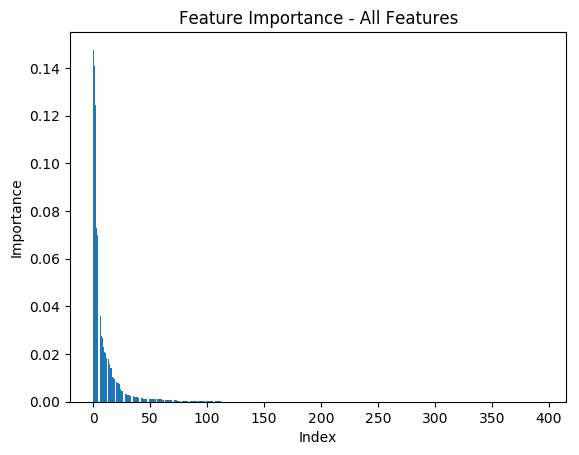

In [143]:
x=np.arange(len(df['Feature_Name']))
y=np.array(df['Importance'])
plt.title('Feature Importance - All Features')
plt.xlabel('Index')
plt.ylabel('Importance')
plt.bar(x,y)
plt.show()

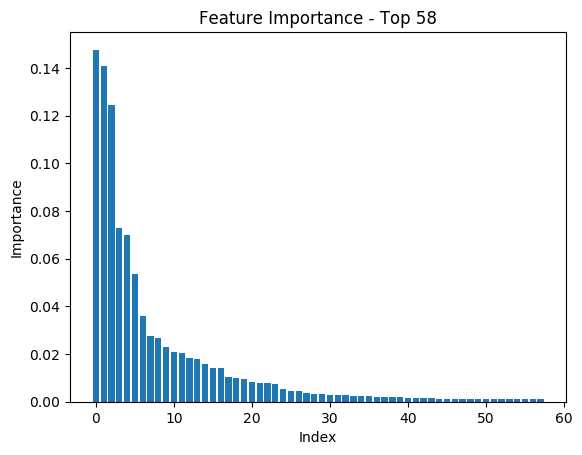

In [135]:
df=df[df['Importance']>0.001]
x=np.arange(len(df['Feature_Name']))
y=np.array(df['Importance'])
plt.title('Feature Importance - Top 58')
plt.xlabel('Index')
plt.ylabel('Importance')
plt.bar(x,y)
plt.show()

In [116]:
# For output to put onto Kaggle website for scoring:

my_df = pd.DataFrame(sorted(zip(feature_importances,attributes),reverse=True))
my_df.to_csv('features.csv', index=False, header=False)

In [25]:
best_attributes = sorted(zip(feature_importances,attributes),reverse=True)
best_attributes_30 = (dict(best_attributes[:58])).values()
X_train=X_train[list(best_attributes_30)]
X_test=X_test[list(best_attributes_30)]

In [32]:
#Random Forest Regressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train,y_train)
random_forest_model_mse = mean_squared_error(y_test,random_forest_model.predict(X_test))
random_forest_model_mse

0.17552726903769175

In [33]:
random_forest_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [26]:
param_grid = [
 {'n_estimators': [5,10,15,20],'min_samples_leaf': [1,10,20],'min_samples_split':[2,4,6]},
 {'bootstrap': [False], 'n_estimators': [5,10], 'min_samples_leaf':[1,10,20]}
]
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train,y_train)

random_forest_model = grid_search.best_estimator_
random_forest_model_mse = mean_squared_error(y_test,random_forest_model.predict(X_test))
random_forest_model_mse

0.17957293021919044

In [27]:
print(grid_search.best_params_)

{'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 15}


In [28]:
mean_ = train_set.cost.mean()
std_ = train_set.cost.std()


random_forest_rmsle=rmsle(
    std_scaler_inverse(random_forest_model.predict(X_test),mean_,std_),
    std_scaler_inverse(y_test,mean_,std_)
)


rmsle_dict = dict({'Random Forest':random_forest_rmsle})
rmsle_dict

{'Random Forest': 0.2731780881523333}

In [49]:
# Split training dataset into 'train' and 'test'

price = train.cost_std_scaled
features = train.drop('cost_std_scaled',axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.20, random_state=42)

print("Training and testing split was successful.")

best_attributes = sorted(zip(feature_importances,attributes),reverse=True)
best_attributes_30 = (dict(best_attributes[:58])).values()
X_train=X_train[list(best_attributes_30)]
X_test=X_test[list(best_attributes_30)]
mean_ = train_set.cost.mean()
std_ = train_set.cost.std()


random_forest_rmsle=rmsle(
    std_scaler_inverse(random_forest_model.predict(X_test),mean_,std_),
    std_scaler_inverse(y_test,mean_,std_)
)


rmsle_dict = dict({'Random Forest':random_forest_rmsle})
rmsle_dict

Training and testing split was successful.


{'Random Forest': 0.2731780881523333}

In [43]:
# Split training dataset into 'train' and 'test'

price = train.cost_std_scaled
features = train.drop('cost_std_scaled',axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.20, random_state=43)

print("Training and testing split was successful.")

best_attributes = sorted(zip(feature_importances,attributes),reverse=True)
best_attributes_30 = (dict(best_attributes[:58])).values()
X_train=X_train[list(best_attributes_30)]
X_test=X_test[list(best_attributes_30)]
mean_ = train_set.cost.mean()
std_ = train_set.cost.std()


random_forest_rmsle=rmsle(
    std_scaler_inverse(random_forest_model.predict(X_test),mean_,std_),
    std_scaler_inverse(y_test,mean_,std_)
)


rmsle_dict = dict({'Random Forest':random_forest_rmsle})
rmsle_dict

Training and testing split was successful.


{'Random Forest': 0.17740278065527737}

In [44]:
# Split training dataset into 'train' and 'test'

price = train.cost_std_scaled
features = train.drop('cost_std_scaled',axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.20, random_state=44)

print("Training and testing split was successful.")

best_attributes = sorted(zip(feature_importances,attributes),reverse=True)
best_attributes_30 = (dict(best_attributes[:58])).values()
X_train=X_train[list(best_attributes_30)]
X_test=X_test[list(best_attributes_30)]
mean_ = train_set.cost.mean()
std_ = train_set.cost.std()


random_forest_rmsle=rmsle(
    std_scaler_inverse(random_forest_model.predict(X_test),mean_,std_),
    std_scaler_inverse(y_test,mean_,std_)
)


rmsle_dict = dict({'Random Forest':random_forest_rmsle})
rmsle_dict

Training and testing split was successful.


{'Random Forest': 0.17115780959245824}

In [47]:
# Split training dataset into 'train' and 'test'

price = train.cost_std_scaled
features = train.drop('cost_std_scaled',axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.10, random_state=66)

print("Training and testing split was successful.")

best_attributes = sorted(zip(feature_importances,attributes),reverse=True)
best_attributes_30 = (dict(best_attributes[:58])).values()
X_train=X_train[list(best_attributes_30)]
X_test=X_test[list(best_attributes_30)]

mean_ = train_set.cost.mean()
std_ = train_set.cost.std()


random_forest_rmsle=rmsle(
    std_scaler_inverse(random_forest_model.predict(X_test),mean_,std_),
    std_scaler_inverse(y_test,mean_,std_)
)


rmsle_dict = dict({'Random Forest':random_forest_rmsle})
rmsle_dict

Training and testing split was successful.


{'Random Forest': 0.1825118638226553}

In [99]:
std_scaler = StandardScaler()
test_set_num = test_set.drop(['bracket_pricing','tube_assembly_id','supplier','quote_date'],axis=1)
bracket_pricing_ind = pd.get_dummies(test_set.bracket_pricing,drop_first=True)
supplier_ind = pd.get_dummies(test_set.supplier)
df=pd.DataFrame(std_scaler.fit_transform(test_set_num))
df.columns = test_set_num.columns + '_std_scaled'
test = pd.concat([df.reset_index(drop=True),bracket_pricing_ind,supplier_ind],axis=1)
tube_assembly_df = pd.DataFrame(test_set.tube_assembly_id)
test=pd.concat([tube_assembly_df,test],axis=1)
df=pd.merge(test,tube_pre,on='tube_assembly_id')
df=pd.merge(df,components_df_std,on='tube_assembly_id',how='left')
test = pd.merge(df,specs_pre).drop('tube_assembly_id',axis=1)
test = test[list(best_attributes_30)]

In [100]:
# For output to put onto Kaggle website for scoring:

predictions=std_scaler_inverse(random_forest_model.predict(test),mean_,std_)
my_df = pd.DataFrame(predictions)
my_df.to_csv('whorton_predictions4.csv', index=False, header=False)

# Graphing the improvements

In [101]:
modeling_dict = {'Baseline':2.35,'RF 1':0.911177,'RF 2':0.846427,'RF 3':0.796455,'RF 4':0.578730}
objects = modeling_dict.keys()
y_pos = np.arange(len(objects))
performance = modeling_dict.values()

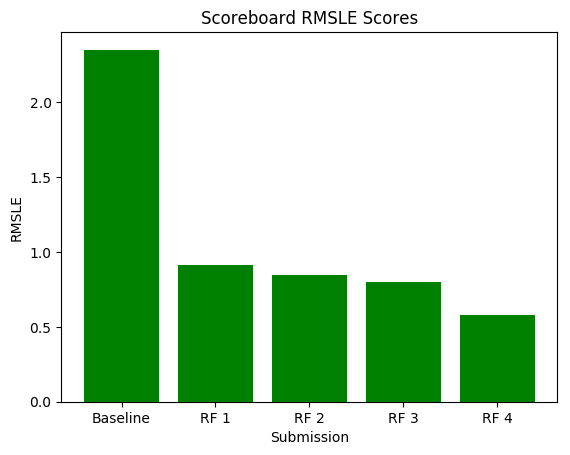

In [102]:
plt.bar(y_pos, performance, align='center', alpha=1,color='green')
plt.xticks(y_pos, objects)
plt.ylabel('RMSLE')
plt.xlabel('Submission')
plt.title('Scoreboard RMSLE Scores')
plt.show()

In [56]:
predictions = np.array(random_forest_model.predict(X_test))
actuals = np.array(y_test)

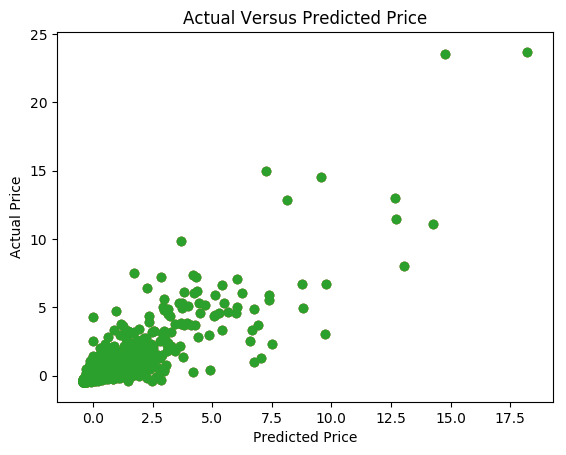

In [63]:
plt.scatter(predictions,actuals)
plt.ylabel('Actual Price')
plt.xlabel('Predicted Price')
plt.title('Actual Versus Predicted Price')
plt.show()

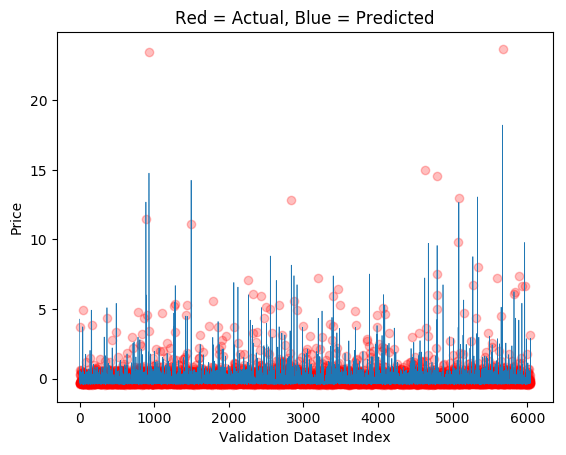

In [75]:
plt.plot(actuals,'ro',alpha=0.25)
plt.plot(predictions,linewidth=0.5,alpha=1)
plt.xlabel('Validation Dataset Index')
plt.ylabel('Price')
plt.title('Red = Actual, Blue = Predicted')
plt.show()

# Ensemble Learning

In [103]:
std_scaler = StandardScaler()
train_set_num = train_set.drop(['bracket_pricing','tube_assembly_id','supplier','quote_date'],axis=1)
bracket_pricing_ind = pd.get_dummies(train_set.bracket_pricing,drop_first=True)
supplier_ind = pd.get_dummies(train_set.supplier)
df=pd.DataFrame(std_scaler.fit_transform(train_set_num))
df.columns = train_set_num.columns + '_std_scaled'
train = pd.concat([df.reset_index(drop=True),bracket_pricing_ind,supplier_ind],axis=1)
tube_assembly_df = pd.DataFrame(train_set.tube_assembly_id)
train=pd.concat([tube_assembly_df,train],axis=1)
df=pd.merge(train,tube_pre,on='tube_assembly_id')
df=pd.merge(df,components_df_std,on='tube_assembly_id',how='left')
train = pd.merge(df,specs_pre).drop('tube_assembly_id',axis=1)

In [104]:
# Split training dataset into 'train' and 'test'

price = train.cost_std_scaled
features = train.drop('cost_std_scaled',axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.20, random_state=42)

print("Training and testing split was successful.")

Training and testing split was successful.


In [105]:
std_scaler = StandardScaler()
test_set_num = test_set.drop(['bracket_pricing','tube_assembly_id','supplier','quote_date'],axis=1)
bracket_pricing_ind = pd.get_dummies(test_set.bracket_pricing,drop_first=True)
supplier_ind = pd.get_dummies(test_set.supplier)
df=pd.DataFrame(std_scaler.fit_transform(test_set_num))
df.columns = test_set_num.columns + '_std_scaled'
test = pd.concat([df.reset_index(drop=True),bracket_pricing_ind,supplier_ind],axis=1)
tube_assembly_df = pd.DataFrame(test_set.tube_assembly_id)
test=pd.concat([tube_assembly_df,test],axis=1)
df=pd.merge(test,tube_pre,on='tube_assembly_id')
df=pd.merge(df,components_df_std,on='tube_assembly_id',how='left')
test = pd.merge(df,specs_pre).drop('tube_assembly_id',axis=1)

In [106]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),n_estimators=300,learning_rate=1)
ada_reg.fit(X_train,y_train)
mean_squared_error(ada_reg.predict(X_test),y_test)

6.9558498922906367

In [107]:
# For output to put onto Kaggle website for scoring:

predictions=std_scaler_inverse(ada_reg.predict(test),mean_,std_)
my_df = pd.DataFrame(predictions)
my_df.to_csv('whorton_predictions5.csv', index=False, header=False)

In [108]:
gbrt = GradientBoostingRegressor(max_depth=100,n_estimators=100,learning_rate=0.1)
gbrt.fit(X_train,y_train)
mean_squared_error(gbrt.predict(X_test),y_test)

0.33366821211975167

In [109]:
gbrt = GradientBoostingRegressor(max_depth=100,n_estimators=120)
gbrt.fit(X_train,y_train)
errors=[mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators=np.argmin(errors)
gbrt_best = GradientBoostingRegressor(max_depth=100,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train,y_train)
mean_squared_error(gbrt_best.predict(X_test),y_test)

0.28891665452050952

In [110]:
gbrt = GradientBoostingRegressor(max_depth=20,n_estimators=120)
gbrt.fit(X_train,y_train)
errors=[mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators=np.argmin(errors)
gbrt_best = GradientBoostingRegressor(max_depth=20,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train,y_train)
mean_squared_error(gbrt_best.predict(X_test),y_test)

0.27254253483114171

# References

Geron, Aurelien.  "Hands-On Machine Learning with SciKit-Learn & Tensorflow"  Chapter 7 pages 181 - 203